In [1]:
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Loading Breast Cancer data set
X,y = datasets.load_breast_cancer(return_X_y= True)

In [3]:
X.shape  # we have 30 Features and 569 observation

(569, 30)

In [4]:
feature_name = datasets.load_breast_cancer().feature_names
target_name = datasets.load_breast_cancer().target_names

In [5]:
df = pd.DataFrame(X,columns = feature_name)
df['target']=y

In [6]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [ ]:
#checking for Missing Values
df.isna().sum()*100/len(df)

mean radius                0.0
mean texture               0.0
mean perimeter             0.0
mean area                  0.0
mean smoothness            0.0
mean compactness           0.0
mean concavity             0.0
mean concave points        0.0
mean symmetry              0.0
mean fractal dimension     0.0
radius error               0.0
texture error              0.0
perimeter error            0.0
area error                 0.0
smoothness error           0.0
compactness error          0.0
concavity error            0.0
concave points error       0.0
symmetry error             0.0
fractal dimension error    0.0
worst radius               0.0
worst texture              0.0
worst perimeter            0.0
worst area                 0.0
worst smoothness           0.0
worst compactness          0.0
worst concavity            0.0
worst concave points       0.0
worst symmetry             0.0
worst fractal dimension    0.0
target                     0.0
dtype: float64

## EDA

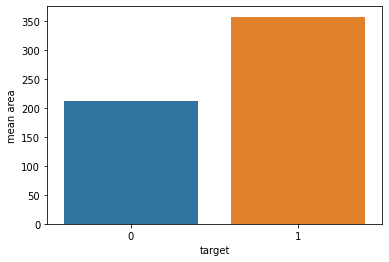

In [ ]:
## Class Distribution of Target Variable ( Actual Values )
df_distribution = df[['target','mean area']].groupby('target').count().reset_index(drop=False)
plt.figure()
sns.barplot(x='target',y='mean area',data = df_distribution)
plt.show()

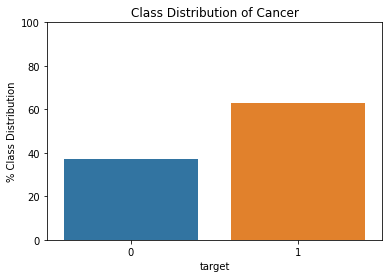

In [ ]:
## Class Distribution in % terms
df_dist = (df[['target','mean area']].groupby('target').count()*100/len(df)).reset_index(drop=False)
plt.figure()
sns.barplot(x='target',y='mean area',data = df_dist)
plt.ylabel('% Class Distribution')
plt.title("Class Distribution of Cancer")
plt.ylim(0,100)
plt.show()

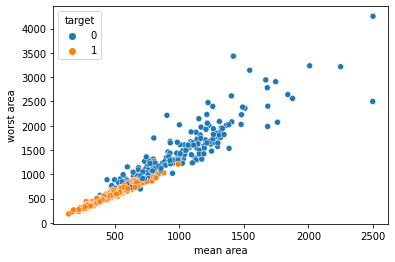

In [ ]:
## Mean Area vs Worst Area
plt.figure()
sns.scatterplot(x='mean area',y='worst area',data = df,hue='target')
plt.show()

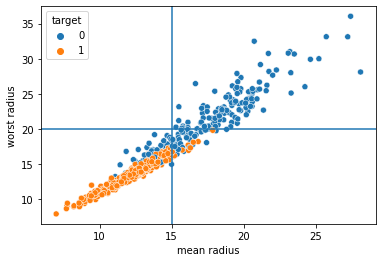

In [ ]:
## Mean Area vs Worst Area
plt.figure()
sns.scatterplot(x='mean radius',y='worst radius',data = df,hue='target')
plt.axvline(15)
plt.axhline(20)
plt.show()

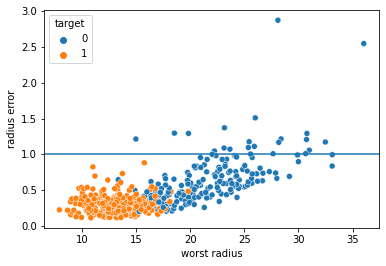

In [ ]:
sns.scatterplot(x='worst radius',y='radius error',data=df,hue='target')
plt.axhline(1)

## Modelling

In [ ]:
## Train Test Split

from sklearn.model_selection import train_test_split

In [ ]:
train,test = train_test_split(df,test_size =0.2,random_state =1 )

In [ ]:
x_train = train.drop('target',axis =1)
y_train = train['target']
x_test = test.drop('target',axis=1)
y_test = test['target']

### Vanilla Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(penalty='l2',C=0.000001,class_weight=None) ## This will create a non regularized Logistic Regression

In [ ]:
model.fit(x_train,y_train)

LogisticRegression(C=1e-06, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_train_predict = model.predict(x_train) ## you will get predicted class with threshold of 50
y_train_proba = model.predict_proba(x_train) ## you will get probability values

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [ ]:
def proba_class(y_proba,threshold = 0.5):
    predicted_class = [1 if a[1] > threshold else 0 for a in y_proba]
    return np.array(predicted_class)

In [ ]:
## Create Confusion Matrix with different threshold
y_pred_train = proba_class(y_train_proba,0.5)
confusion_matrix(y_train,y_pred_train)

array([[139,  31],
       [  7, 278]])

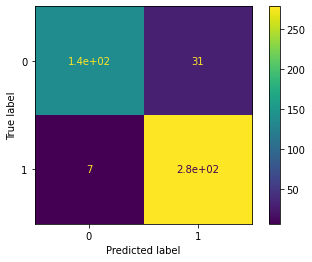

In [ ]:
## Visualize your confusion Matrix
plot_confusion_matrix(model, x_train, y_train)
plt.show()  

In [ ]:
## Precision Recall Values

from sklearn.metrics import precision_score,recall_score,fbeta_score

In [ ]:
def classification_metics(y_actual,y_pred):
    precision = precision_score(y_actual,y_pred)
    recall= recall_score(y_actual,y_pred)
    fb = fbeta_score(y_actual,y_pred,beta =1)
    return(precision,recall,fb)

In [ ]:
classification_metics(y_train,y_pred_train)

Precision :0.9 Recall:0.98 F1-Score:0.94


In [ ]:
thresholds=[]
prec=[]
recall=[]
fb=[]
for threshold in range(10,100,10):
    trsh = threshold/100
    y_pred_train = proba_class(y_train_proba,trsh)
    print("Threshold: {}".format(trsh))
    p,r,f=classification_metics(y_train,y_pred_train)
    prec.append(p)
    recall.append(r)
    fb.append(f)
    thresholds.append(trsh)

Threshold: 0.1
Precision :0.8 Recall:1.0 F1-Score:0.89
Threshold: 0.2
Precision :0.83 Recall:1.0 F1-Score:0.9
Threshold: 0.3
Precision :0.85 Recall:0.99 F1-Score:0.91
Threshold: 0.4
Precision :0.87 Recall:0.99 F1-Score:0.93
Threshold: 0.5
Precision :0.9 Recall:0.98 F1-Score:0.94
Threshold: 0.6
Precision :0.91 Recall:0.95 F1-Score:0.93
Threshold: 0.7
Precision :0.95 Recall:0.9 F1-Score:0.93
Threshold: 0.8
Precision :0.98 Recall:0.83 F1-Score:0.9
Threshold: 0.9
Precision :0.98 Recall:0.6 F1-Score:0.75


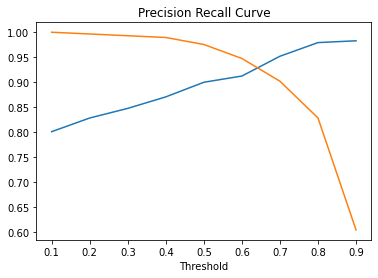

In [ ]:
sns.lineplot(x=thresholds ,y =prec)
sns.lineplot(x=thresholds,y=recall)
plt.xlabel('Threshold')
plt.title('Precision Recall Curve')
plt.show()

In [ ]:
### ROC AUC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, [a[1] for a in y_train_proba])

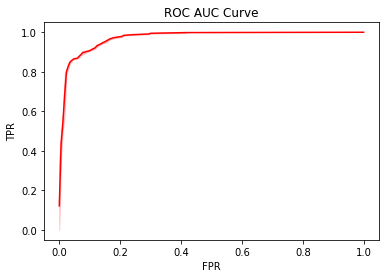

In [ ]:
sns.lineplot(x=fpr,y=tpr,color='red')
plt.title("ROC AUC Curve")
plt.xlabel("FPR")
plt.ylabel('TPR')
plt.show()

In [ ]:
roc_auc = pd.DataFrame(fpr,columns = ['FPR'])
roc_auc['TPR'] = tpr
roc_auc['Threshold'] = thresholds

In [ ]:
roc_auc

,FPR,TPR,Threshold
0,0.000000,0.000000,1.994012e+00
1,0.000000,0.003509,9.940120e-01
2,0.000000,0.361404,9.477971e-01
3,0.005882,0.361404,9.472056e-01
4,0.005882,0.505263,9.246012e-01
5,0.011765,0.505263,9.243333e-01
6,0.011765,0.578947,9.081924e-01
7,0.017647,0.578947,9.081741e-01
8,0.017647,0.789474,8.209803e-01
9,0.023529,0.789474,8.199744e-01


In [ ]:
def classification_report(y_actual,y_proba):
    thresh=[]
    prec=[]
    recall=[]
    fb=[]
    for threshold in range(10,100,10):
    trsh = threshold/100
    y_pred_train = [1 if a > trsh else 0 for a in y_proba]
    p,r,f=classification_metics(y_train,y_pred_train)
    prec.append(p)
    recall.append(r)
    fb.append(f)
    thresh.append(trsh)
    fpr, tpr, thresholds = roc_curve(y_train, y_proba)
  
    f, (ax1, ax2) = plt.subplots(1, 2)
    ax1.plot(thresh, prec,label = 'precision')
    ax1.plot(thresh,recall,label = 'recall')
    ax1.set_title('PR Curve')
    ax2.plot(fpr,tpr,color='red',label ='ROC-AUC')
    ax2.set_title("ROC AUC Curve")
    plt.show()

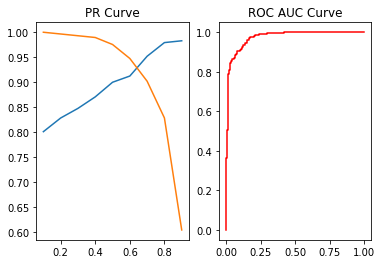

In [ ]:
classification_report(y_train,y_train_proba)

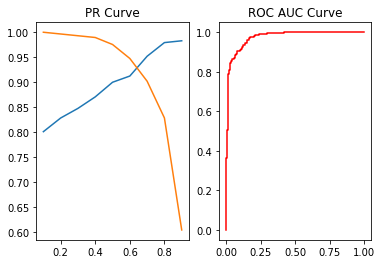

In [ ]:
model = LogisticRegression(penalty='l2',C=0.000001,class_weight=None) ## This will create a non regularized Logistic Regression
model.fit(x_train,y_train)
y_train_proba= [a[1] for a in model.predict_proba(x_train)]
classification_report(y_train,y_train_proba)

In [ ]:
## Test Data
y_test_proba = model.predict_proba(x_test)
y_tst = [1 if a[1]> 0.65 else 0 for a in y_test_proba]
classification_metics(y_test,y_tst)

(0.8701298701298701, 0.9305555555555556, 0.8993288590604027)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


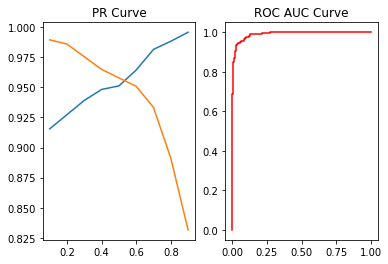

In [ ]:
model = LogisticRegression(penalty='l2',C=5,class_weight='balanced') ## This will create a non regularized Logistic Regression
model.fit(x_train,y_train)
y_train_proba= [a[1] for a in model.predict_proba(x_train)]
classification_report(y_train,y_train_proba)

In [ ]:
## Test Data
y_test_proba = model.predict_proba(x_test)
y_tst = [1 if a[1]> 0.65 else 0 for a in y_test_proba]
classification_metics(y_test,y_tst)

(0.9577464788732394, 0.9444444444444444, 0.951048951048951)

In [ ]:
#### Grid Search
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'C':[0.1,1,5,10,15,20],
          'class_weight':[None,'balanced']}
model = GridSearchCV(LogisticRegression(),param_grid=params,scoring='roc_auc',cv=5,n_jobs = -1)

In [ ]:
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 5, 10, 15, 20],
                         'class_weight': [None, 'balanced']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [ ]:
model.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

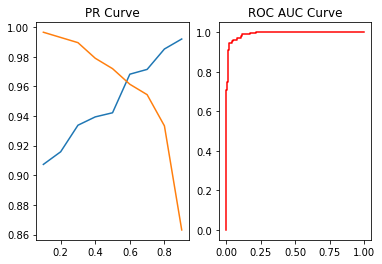

In [ ]:
y_train_proba= [a[1] for a in model.predict_proba(x_train)]
classification_report(y_train,y_train_proba)

In [ ]:
## Test Data
y_test_proba = model.predict_proba(x_test)
y_tst = [1 if a[1]> 0.65 else 0 for a in y_test_proba]
classification_metics(y_test,y_tst)

(0.9583333333333334, 0.9583333333333334, 0.9583333333333334)